In [2]:
# Select the Right Threshold values using ROC Curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [3]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [4]:
X.shape

(2000, 20)

In [6]:
X

array([[-0.62070677,  1.39769519,  0.1034997 , ..., -0.34409714,
         0.62197727, -1.79645246],
       [ 0.90592186,  1.9199751 , -0.7783715 , ..., -1.30560469,
        -1.54476766, -0.24532071],
       [ 0.27902104,  0.85887666,  1.20780417, ...,  2.50374447,
        -0.16497195, -1.95912025],
       ...,
       [ 0.40426899, -0.61988039,  0.87588292, ...,  0.61529851,
         0.97573222,  1.77717222],
       [-0.02512151, -1.05618212, -0.2345739 , ..., -1.6839064 ,
        -0.33327389,  1.13979455],
       [-1.46739126, -0.12314487,  0.66858242, ...,  1.92945851,
        -0.97878106, -2.77522263]])

In [5]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Random Forest

In [8]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9846444444444444


In [9]:
ytrain_pred

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.01, 0.99],
       ...,
       [0.99, 0.01],
       [0.99, 0.01],
       [0.27, 0.73]])

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


## AdaBoost

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


In [13]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9851222222222223


In [14]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.97,0.966929,0.538202,0.8
3,0.97,0.761539,0.509875,0.8
4,0.48,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.01,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [15]:
final_prediction

0      0.882762
1      0.115823
2      0.818783
3      0.760353
4      0.537447
         ...   
595    0.121340
596    0.112845
597    0.876697
598    0.160717
599    0.837357
Length: 600, dtype: float64

## ROC

In [16]:
#### Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.90543872, 0.90327475, 0.80083537,
       0.8005558 , 0.79037052, 0.78912833, 0.78452438, 0.78321156,
       0.77742916, 0.77537124, 0.72185853, 0.72137362, 0.65692282,
       0.65243537, 0.60712652, 0.59114346, 0.58088469, 0.57925354,
       0.57327749, 0.57300386, 0.5715152 , 0.56719563, 0.55292732,
       0.55127948, 0.52615858, 0.50866892, 0.45700602, 0.44536956,
       0.4421034 , 0.37155357, 0.35336612, 0.24599466, 0.24390421,
       0.2371341 , 0.23646893, 0.20602808, 0.20598417, 0.12562642,
       0.1253351 , 0.10548439])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
29,0.445370,0.960000
28,0.457006,0.960000
30,0.442103,0.958333
27,0.508669,0.958333
26,0.526159,0.956667


In [18]:
accuracy_ls

,thresholds,accuracy
29,0.445370,0.960000
28,0.457006,0.960000
30,0.442103,0.958333
27,0.508669,0.958333
26,0.526159,0.956667
21,0.573004,0.953333
25,0.551279,0.953333
20,0.573277,0.951667
24,0.552927,0.951667
23,0.567196,0.951667


In [19]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

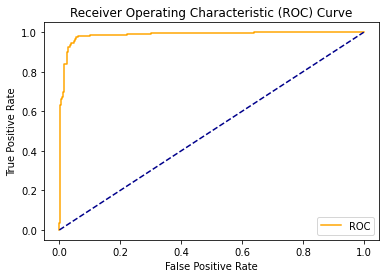

In [20]:
plot_roc_curve(fpr,tpr)